# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

631

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = 'http://api.openweathermap.org/data/2.5/weather?'
units = 'imperial'

query_url = f'{url}appid={weather_api_key}&units={units}&q='

name = []
lat = []
lng = []
max_temp = []
humid = []
cloud = []
wind = []
country = []
date = []

print('Beginning Data Retrieval')
print('-----------------------------')

for city in cities:
    try:
        response = requests.get(query_url + city).json()
# print(json.dumps(response, indent=4))
        name.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humid.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        print(f'Processing Record {cities.index(city)+1} of {len(cities)} | {city}')
    except:
        print('City not found. Skipping...')        

print('-----------------------------')
print('Data Retrieval Complete')
print('-----------------------------')

Beginning Data Retrieval
-----------------------------
City not found. Skipping...
Processing Record 2 of 631 | mataura
Processing Record 3 of 631 | gat
Processing Record 4 of 631 | albany
City not found. Skipping...
Processing Record 6 of 631 | turmalina
City not found. Skipping...
Processing Record 8 of 631 | karratha
Processing Record 9 of 631 | omboue
Processing Record 10 of 631 | dingle
Processing Record 11 of 631 | am timan
Processing Record 12 of 631 | chibuto
Processing Record 13 of 631 | palmer
Processing Record 14 of 631 | bredasdorp
Processing Record 15 of 631 | new norfolk
Processing Record 16 of 631 | butaritari
City not found. Skipping...
Processing Record 18 of 631 | martapura
Processing Record 19 of 631 | san patricio
Processing Record 20 of 631 | bluff
City not found. Skipping...
Processing Record 22 of 631 | tezu
Processing Record 23 of 631 | arraial do cabo
City not found. Skipping...
Processing Record 25 of 631 | atar
City not found. Skipping...
Processing Record 27

Processing Record 212 of 631 | nanortalik
City not found. Skipping...
Processing Record 214 of 631 | grandview
Processing Record 215 of 631 | anloga
Processing Record 216 of 631 | assiniboia
Processing Record 217 of 631 | havelock
Processing Record 218 of 631 | upornaya
Processing Record 219 of 631 | khalkhal
Processing Record 220 of 631 | la palma
Processing Record 221 of 631 | touros
Processing Record 222 of 631 | honningsvag
Processing Record 223 of 631 | singaraja
Processing Record 224 of 631 | faanui
Processing Record 225 of 631 | taoudenni
Processing Record 226 of 631 | soe
Processing Record 227 of 631 | tuntum
Processing Record 228 of 631 | sokoto
Processing Record 229 of 631 | hamilton
Processing Record 230 of 631 | lorengau
Processing Record 231 of 631 | camacha
Processing Record 232 of 631 | alofi
Processing Record 233 of 631 | korla
Processing Record 234 of 631 | port macquarie
Processing Record 235 of 631 | diffa
Processing Record 236 of 631 | hithadhoo
Processing Record 23

Processing Record 421 of 631 | blagoyevo
Processing Record 422 of 631 | bud
Processing Record 423 of 631 | sweetwater
Processing Record 424 of 631 | mogadishu
Processing Record 425 of 631 | markova
Processing Record 426 of 631 | malatya
City not found. Skipping...
Processing Record 428 of 631 | goba
City not found. Skipping...
Processing Record 430 of 631 | grand-santi
Processing Record 431 of 631 | pulaski
Processing Record 432 of 631 | zhob
Processing Record 433 of 631 | mar del plata
Processing Record 434 of 631 | babanka
Processing Record 435 of 631 | lochgilphead
Processing Record 436 of 631 | pacocha
Processing Record 437 of 631 | sioux lookout
Processing Record 438 of 631 | kununurra
Processing Record 439 of 631 | beitbridge
City not found. Skipping...
Processing Record 441 of 631 | huanren
Processing Record 442 of 631 | festus
Processing Record 443 of 631 | kota tinggi
Processing Record 444 of 631 | narsaq
Processing Record 445 of 631 | narsingi
Processing Record 446 of 631 | o

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [20]:
# Output File (CSV)
cities_df = pd.DataFrame({'City': name, 'Lat': lat, 'Lng': lng, 'Max Temp': max_temp, 'Humidity': humid, 
                          'Cloudiness': cloud, 'Wind Speed': wind, 'Country': country, 'Date': date})
cities_df

cities_df.to_csv('output_data/cities.csv', encoding="utf-8", index=False)
cities_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mataura,-46.19,168.86,55.49,76,100,4.41,NZ,1596259398
1,Kiryat Gat,31.61,34.76,77.00,55,0,3.00,IL,1596259398
2,Albany,42.60,-73.97,72.00,64,0,3.76,US,1596259344
3,Turmalina,-17.29,-42.73,59.86,91,93,4.27,BR,1596259399
4,Karratha,-20.74,116.85,83.21,17,0,10.04,AU,1596259399
...,...,...,...,...,...,...,...,...,...
572,Mangawān,24.68,81.55,93.09,50,49,6.46,IN,1596259532
573,Elko,41.00,-115.50,80.01,18,1,7.25,US,1596259532
574,San Felipe,10.34,-68.74,72.79,82,70,4.52,VE,1596259532
575,São José da Coroa Grande,-8.90,-35.15,74.21,85,33,10.45,BR,1596259532


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [5]:
# Use boolean variable to filter data
humidity_test = cities_df['Humidity']<=100
humidity_test_pass = cities_df[humidity_test]
humidity_test_pass.shape

# No cities have humidity > 100%

(577, 9)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

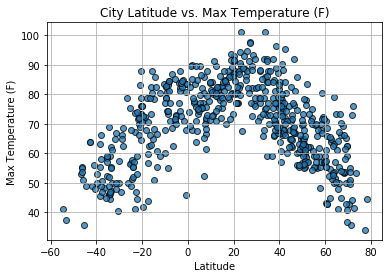

In [21]:
plt.scatter(lat, max_temp, marker='o', facecolors='tab:blue', edgecolors='black', alpha=0.75)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs. Max Temperature (F)')
plt.grid(b=True)

plt.savefig('output_data/png01', dpi=300, bbox_inches='tight')
plt.show()

This graph demonstrates that as you get closer to the equator, the maximum temperature increases. Similarly, as you get further from the equator, the maximum temperature decreases.

## Latitude vs. Humidity Plot

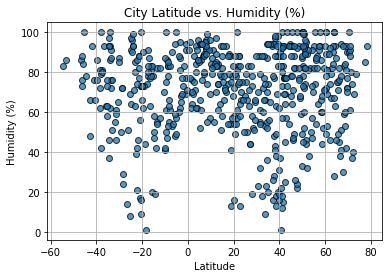

In [22]:
plt.scatter(lat, humid, marker='o', facecolors='tab:blue', edgecolors='black', alpha=0.75)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity (%)')
plt.grid(b=True)

plt.savefig('output_data/png02', dpi=300, bbox_inches='tight')
plt.show()

This graph demonstrates that the percent humidity is highly variable regardless of latitude, with less variance closer to the equator.  

## Latitude vs. Cloudiness Plot

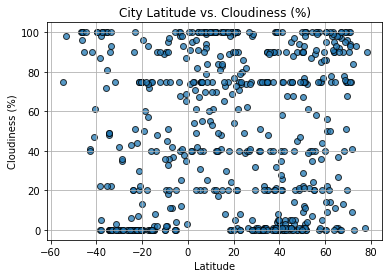

In [23]:
plt.scatter(lat, cloud, marker='o', facecolors='tab:blue', edgecolors='black', alpha=0.75)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness (%)')
plt.grid(b=True)

plt.savefig('output_data/png03', dpi=300, bbox_inches='tight')
plt.show()

This graph demonstrates that the percent cloudiness is highly variable regardless of lattitude, with the least cloudy places being between the poles and the equator.

## Latitude vs. Wind Speed Plot

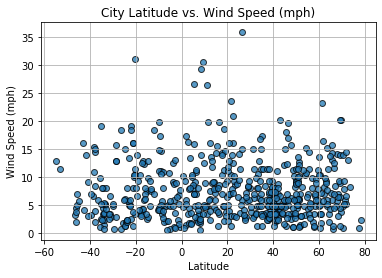

In [24]:
plt.scatter(lat, wind, marker='o', facecolors='tab:blue', edgecolors='black', alpha=0.75)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs. Wind Speed (mph)')
plt.grid(b=True)

plt.savefig('output_data/png04', dpi=300, bbox_inches='tight')
plt.show()

This graph demonstrates that the wind speed is highly variable regardless of lattitude. There appears to be an outlier here around latitude 25.

## Linear Regression

In [10]:
# OPTIONAL: Create a function to create Linear Regression plots

In [11]:
# Create Northern and Southern Hemisphere DataFrames
is_northern_city = cities_df['Lat']>=0
northern_city_df = cities_df[is_northern_city]
northern_city_df.shape

is_southern_city = cities_df['Lat']<0
southern_city_df = cities_df[is_southern_city]
southern_city_df.shape

(169, 9)

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

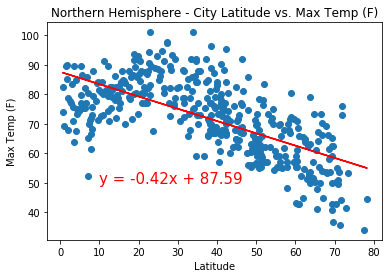

In [25]:
# Add the linear regression equation and line to plot
x_values = northern_city_df['Lat']
y_values = northern_city_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
line_eq
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title('Northern Hemisphere - City Latitude vs. Max Temp (F)')

plt.savefig('output_data/png05', dpi=300, bbox_inches='tight')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

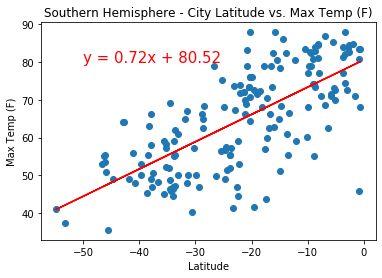

In [26]:
# Add the linear regression equation and line to plot
x_values = southern_city_df['Lat']
y_values = southern_city_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
line_eq
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,80),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title('Southern Hemisphere - City Latitude vs. Max Temp (F)')

plt.savefig('output_data/png06', dpi=300, bbox_inches='tight')
plt.show()

For cities in the northern hemisphere, there is a negative correlation between latitude and max temperature. For cities in the southern hemisphere, there is a positive correlation between latitude and max temperature. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

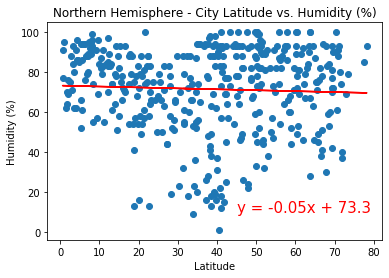

In [27]:
# Add the linear regression equation and line to plot
x_values = northern_city_df['Lat']
y_values = northern_city_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
line_eq
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - City Latitude vs. Humidity (%)')

plt.savefig('output_data/png07', dpi=300, bbox_inches='tight')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

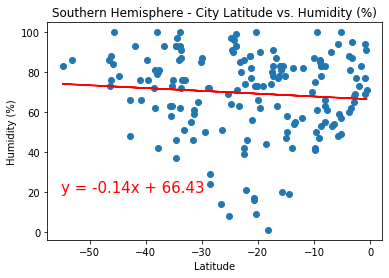

In [28]:
# Add the linear regression equation and line to plot
x_values = southern_city_df['Lat']
y_values = southern_city_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
line_eq
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - City Latitude vs. Humidity (%)')

plt.savefig('output_data/png08', dpi=300, bbox_inches='tight')
plt.show()

For cities in the northern and southern hemispheres, there is no significant correlation between latitude and humidity. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

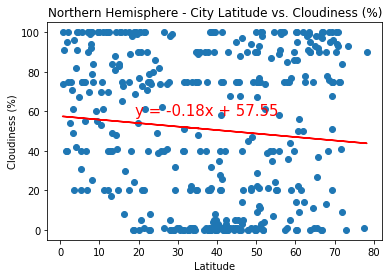

In [29]:
# Add the linear regression equation and line to plot
x_values = northern_city_df['Lat']
y_values = northern_city_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
line_eq
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(19,58),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - City Latitude vs. Cloudiness (%)')

plt.savefig('output_data/png09', dpi=300, bbox_inches='tight')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

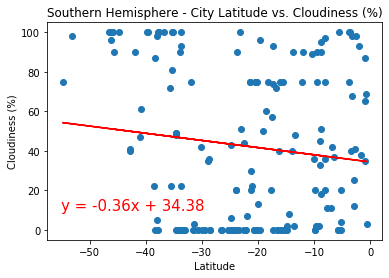

In [17]:
# Add the linear regression equation and line to plot
x_values = southern_city_df['Lat']
y_values = southern_city_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
line_eq
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere - City Latitude vs. Cloudiness (%)')

plt.savefig('output_data/png10', dpi=300, bbox_inches='tight')
plt.show()

For cities in the northern and southern hemispheres, there is no significant correlation between latitude and cloudiness. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

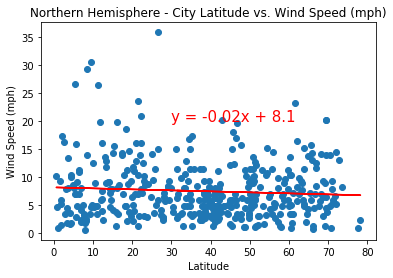

In [18]:
# Add the linear regression equation and line to plot
x_values = northern_city_df['Lat']
y_values = northern_city_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
line_eq
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - City Latitude vs. Wind Speed (mph)')

plt.savefig('output_data/png11', dpi=300, bbox_inches='tight')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

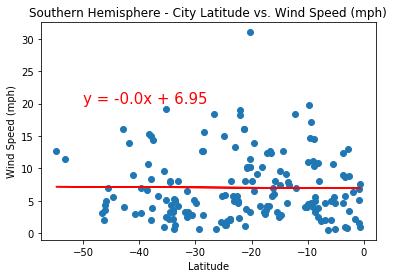

In [19]:
# Add the linear regression equation and line to plot
x_values = southern_city_df['Lat']
y_values = southern_city_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
line_eq
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere - City Latitude vs. Wind Speed (mph)')

plt.savefig('output_data/png12', dpi=300, bbox_inches='tight')
plt.show()

For cities in the northern and southern hemispheres, there is no significant correlation between latitude and humidity. 